In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

D:\Side-Projects\ShortcutFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
ids = tokenizer("[CLS] hello world [SEP] [CLS] [SEP] Ala [SEP]")["input_ids"]
ids

[101, 101, 7592, 2088, 102, 101, 102, 21862, 102, 102]

In [9]:
tokenizer.decode(ids, skip_special_tokens=True)

'hello world ala'

In [5]:
batch1 = ["The cat sat one the mat", "I like cooking in the morning"]
batch2 = ["The dog watches tv", "The elphant sneezes"]
tokens1 = tokenizer(batch1)["input_ids"]
tokens2 = tokenizer(batch2)["input_ids"]
tokens1

[[101, 1996, 4937, 2938, 2028, 1996, 13523, 102],
 [101, 1045, 2066, 8434, 1999, 1996, 2851, 102]]

In [6]:
concat = tokenizer(batch1[0])["input_ids"] + tokenizer(batch1[1])["input_ids"]
decoded = tokenizer.decode(concat, skip_special_tokens=False)
decoded

'[CLS] the cat sat one the mat [SEP] [CLS] i like cooking in the morning [SEP]'

In [7]:
decoded.split(tokenizer.sep_token, maxsplit=1)

['[CLS] the cat sat one the mat ',
 ' [CLS] i like cooking in the morning [SEP]']

In [8]:
import numpy as np

seqs = []
seqs.append(tokenizer.batch_decode(tokens1, skip_special_tokens=True))
seqs.append(tokenizer.batch_decode(tokens1, skip_special_tokens=True))
seqs.append(tokenizer.batch_decode(tokens1, skip_special_tokens=True))
seqs.append(tokenizer.batch_decode(tokens1, skip_special_tokens=True))
# seqs.append(tokenizer.batch_decode(tokens2, skip_special_tokens=True))
# seqs.append(tokenizer.batch_decode(tokens2, skip_special_tokens=True))
seqs = np.array(seqs).T
seqs

array([['the cat sat one the mat', 'the cat sat one the mat',
        'the cat sat one the mat', 'the cat sat one the mat'],
       ['i like cooking in the morning', 'i like cooking in the morning',
        'i like cooking in the morning', 'i like cooking in the morning']],
      dtype='<U29')

In [9]:
import numpy as np

# Example 2D ndarray
arr = np.array(
    [
        ["hello" + "[SEP]" + "world" + "[SEP]" + "world", "foo" + "[SEP]" + "bar"],
        ["test" + "[SEP]" + "case", "another" + "[SEP]" + "example"],
    ]
)

print(arr)


# Define a tokenizer with sep_token
class Tokenizer:
    sep_token = "[SEP]"


tokenizer = Tokenizer()


# Function to apply decoding
def decode_and_split(decoded):
    return decoded.split(tokenizer.sep_token)[1]
    # return decoded.split(tokenizer.sep_token, maxsplit=1)[1]


# Apply function to each element
vectorized_func = np.vectorize(decode_and_split, otypes=[object])
result = vectorized_func(arr)

print(result)

[['hello[SEP]world[SEP]world' 'foo[SEP]bar']
 ['test[SEP]case' 'another[SEP]example']]
[['world' 'bar']
 ['case' 'example']]


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.optim import AdamW

from shortcutfm.train.optim import (
    LinearSchedulerConfig,
    MyleSchedulerConfig,
    SchedulerFactory,
)

total_steps = 50_000
base_lr = 1e-4

# Create linear decay config
linear_decay_config = LinearSchedulerConfig(
    type="linear",
    start_factor=1.0,  # Start at base_lr
    end_factor=0.0,  # End at 0.1 * base_lr
    total_steps=total_steps,
)

myle_scheduler_config = MyleSchedulerConfig(
    type="myle",
    start_lr=1e-7,
    warmup_steps=1000,
)
optimizer = torch.optim.AdamW([torch.zeros(1, requires_grad=True)], lr=base_lr)

# Get scheduler from factory
# scheduler = SchedulerFactory.get_scheduler("linear", optimizer, linear_decay_config)
scheduler = SchedulerFactory.get_scheduler("myle", optimizer, myle_scheduler_config)

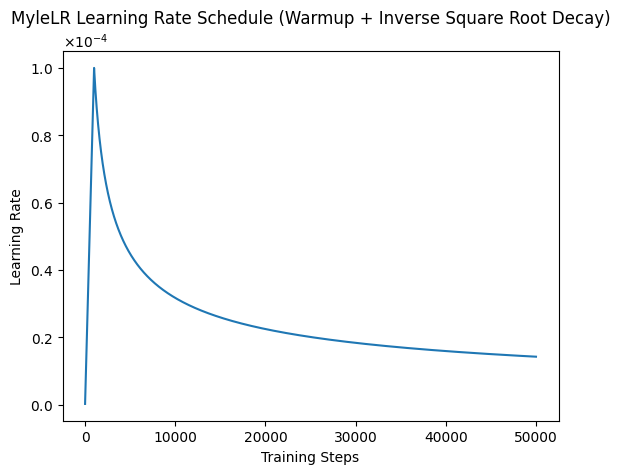

In [18]:
import torch

# Example Usage
# optimizer = torch.optim.AdamW([torch.zeros(1, requires_grad=True)], lr=1e-3)
# scheduler = MyleLR(optimizer, num_warmup_steps=1000, start_lr=0.0, last_epoch=-1)

# Simulate training steps

lrs = []
for _ in range(total_steps):  # Simulating 5000 training steps
    scheduler.step()
    lrs.append(scheduler.get_last_lr()[0])

# Plot the learning rate schedule
plt.plot(lrs)
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.title("MyleLR Learning Rate Schedule (Warmup + Inverse Square Root Decay)")
plt.show()

In [7]:
import torch
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("answerdotai/ModernBERT-base")

# tokenizer.vocab_size
# tokenizer("hello world")["input_ids"]
len(tokenizer.get_vocab())

50368

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [2]:
import torch

# Example tensors
B, T = 2, 5  # Batch size and sequence length
seqs = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])  # Example sequence tensor
input_mask = torch.tensor([[0, 0, 1, 1, 1], [0, 0, 0, 1, 1]])  # Mask where 0 denotes source sequence

# Get only the source sequence (where input_mask == 0)
src_seqs = seqs[input_mask == 0]

print(src_seqs)

tensor([1, 2, 6, 7, 8])


In [313]:
import torch
import torch.nn as nn

torch.manual_seed(42)

# Define an embedding layer
num_embeddings = 30522
embedding_dim = 128
embedding = nn.Embedding(num_embeddings, embedding_dim)
nn.init.normal_(embedding.weight, mean=0.0, std=1e-3)
# Define a linear layer with shared weights
linear = nn.Linear(embedding_dim, num_embeddings, bias=False)
# linear.weight = nn.Parameter(embedding.weight)  # Share weights
linear.weight = embedding.weight  # Share weights

In [318]:
# Input indices
indices = torch.randint(0, num_embeddings, (3,)).to(torch.long)

# Apply embedding
embedded = embedding(indices)

# Apply linear layer
output = linear(embedded)

print("Original indices:", indices)
# print("Embedding output:\n", embedded)
# print("Linear layer output:\n", output)
output.argmax(dim=-1)

Original indices: tensor([ 8852,  8941, 17808])


tensor([ 8852,  8941, 17808])

In [44]:
linear.weight

Parameter containing:
tensor([[ 0.6614, -0.0330, -0.1399,  ...,  0.1509, -0.7863, -0.3508],
        [ 1.2518, -0.3599, -0.4399,  ...,  0.1757,  0.2550,  0.8070],
        [-0.3078,  1.3164,  0.7719,  ...,  0.1600, -0.6769,  0.7504],
        ...,
        [-0.1896, -0.4410,  0.3655,  ..., -0.6175, -1.6529,  0.8730],
        [-1.7685, -0.7183,  0.8850,  ...,  0.0403, -0.6283, -0.9207],
        [-0.2878, -1.0536, -1.5974,  ..., -0.3337,  1.0018,  0.2635]],
       requires_grad=True)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from shortcutfm.train.optim import LinearSchedulerConfig, SchedulerFactory


def plot_lr_schedule(scheduler, total_steps: int, base_lr: float, title: str):
    """Plot learning rate schedule."""
    steps = np.arange(0, total_steps + 500, 50)
    learning_rates = []

    # Get learning rates at each step
    for step in steps:
        # Step the scheduler
        if step > 0:
            scheduler.step()

        # Get current learning rate
        learning_rates.append(scheduler.get_last_lr()[0])

    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.plot(steps, learning_rates, "b-", linewidth=2)
    plt.axvline(x=total_steps, color="r", linestyle="--", label="Total Steps")

    # Add labels and title
    plt.xlabel("Training Steps")
    plt.ylabel("Learning Rate")
    plt.title(title)
    plt.grid(True)

    # Set y-axis to scientific notation
    plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

    # Add text annotations
    # plt.text(0, learning_rates[0] * 1.05, f'Start LR: {learning_rates[0]:.1e}', verticalalignment='bottom')
    # plt.text(total_steps * 0.8, learning_rates[-1] * 1.05, f'End LR: {learning_rates[-1]:.1e}', verticalalignment='bottom')

    plt.legend()
    plt.show()

In [2]:
total_steps = 50_000
base_lr = 1e-4

# Create linear decay config
linear_decay_config = LinearSchedulerConfig(
    type="linear",
    start_factor=1.0,  # Start at base_lr
    end_factor=0.0,  # End at 0.1 * base_lr
    total_steps=total_steps,
)

# Create optimizer with dummy parameters
dummy_model = torch.nn.Linear(1, 1)
optimizer = AdamW(dummy_model.parameters(), lr=base_lr)

# Get scheduler from factory
linear_decay_scheduler = SchedulerFactory.get_scheduler("linear", optimizer, linear_decay_config)

D:\Side-Projects\ShortcutFM\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


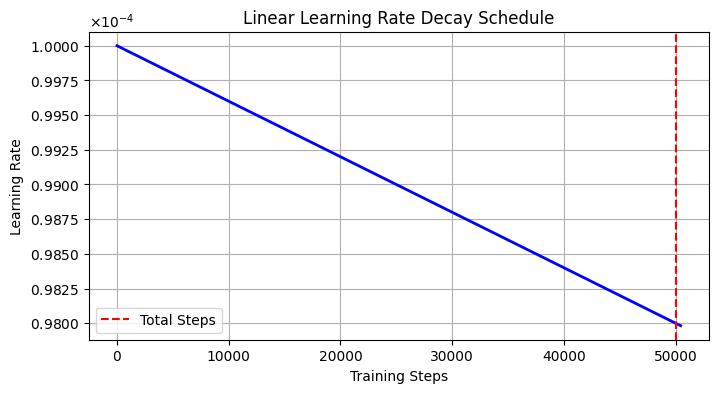

In [3]:
# Plot linear decay
plot_lr_schedule(linear_decay_scheduler, total_steps, base_lr, "Linear Learning Rate Decay Schedule")

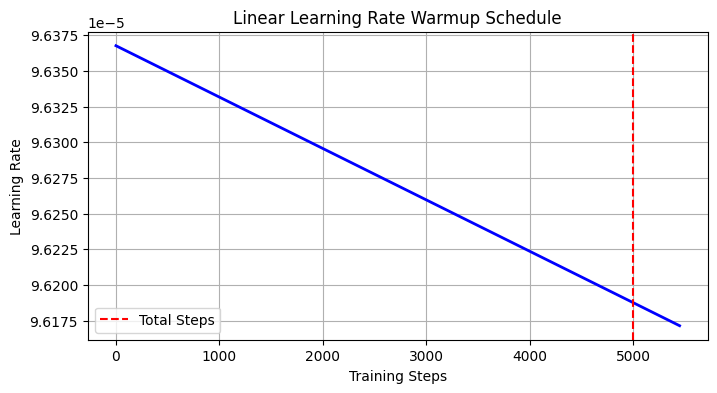

In [14]:
# Example 2: Linear warmup
warmup_steps = 5000

# Create linear warmup config
linear_warmup_config = LinearSchedulerConfig(
    type="linear",
    start_factor=0.1,  # Start at 0.1 * base_lr
    end_factor=1.0,  # End at base_lr
    total_steps=warmup_steps,
)

# Get scheduler from factory

# Plot linear warmup
plot_lr_schedule(
    linear_decay_scheduler,
    warmup_steps,
    base_lr,
    "Linear Learning Rate Warmup Schedule",
)

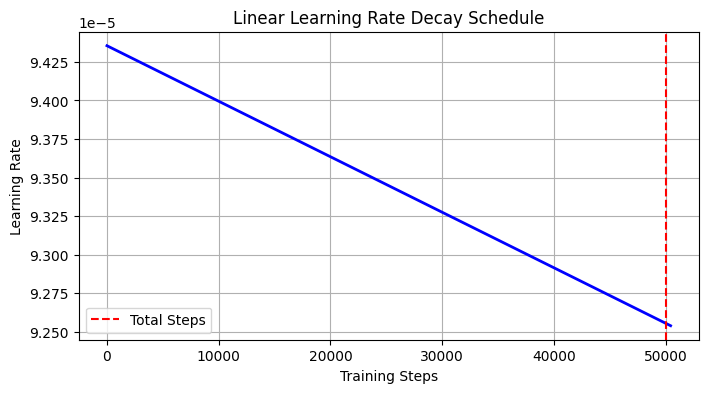

In [16]:
total_steps = 50_000

# Plot linear decay
plot_lr_schedule(linear_decay_scheduler, total_steps, base_lr, "Linear Learning Rate Decay Schedule")